In [1]:
import pandas as pd
import numpy as np
from SVM import SVC
initial_data = pd.read_csv('../../data/data.csv')
initial_data.drop(initial_data.columns[0], axis=1, inplace=True)
for column in initial_data.columns:
    if "Unnamed" in column:
        initial_data.drop(column, axis = 1, inplace=True)

initial_data['diagnosis']=initial_data['diagnosis'].map({'M':1.0,'B':-1.0})

mas = []
for i in initial_data.columns:
    if i != 'diagnosis':
        mas.append(i)


X,y = np.array(initial_data[mas]), np.array(initial_data['diagnosis'])


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(initial_data[mas], initial_data['diagnosis'], test_size=0.25, random_state=42)
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test =np.array(X_test), np.array(y_test)


In [3]:
%%time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from SVM import SVC

# Обучение SVM
svm = SVC(C=2)
svm.fit(X_train, y_train, kernel_type="rbf", gamma=1e-5) 

# Прогноз
y_pred = svm.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.916083916083916
CPU times: user 5.19 s, sys: 2.28 s, total: 7.47 s
Wall time: 5.12 s


In [4]:
%%time
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=1, gamma=1e-5)
clf.fit(X_train, y_train)

print("Точность на тесте:", clf.score(X_test, y_test))


Точность на тесте: 0.951048951048951
CPU times: user 106 ms, sys: 498 ms, total: 604 ms
Wall time: 60.6 ms


In [5]:
%%time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from SVM import SVC
svm = SVC(C=1)
svm.fit(X_train, y_train, kernel_type="linear")
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9440559440559441
CPU times: user 48.9 s, sys: 3.41 s, total: 52.3 s
Wall time: 50.6 s


In [14]:
%%time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from SVM import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train, kernel_type="polynom", d = 2)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9090909090909091
CPU times: user 21.3 s, sys: 2.6 s, total: 23.9 s
Wall time: 21.8 s


In [7]:
%%time
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

print("Точность на тесте:", clf.score(X_test, y_test))


Точность на тесте: 0.958041958041958
CPU times: user 1 s, sys: 2.44 s, total: 3.45 s
Wall time: 805 ms


In [8]:
%%time
from sklearn.svm import SVC

clf = SVC(kernel='poly', C=100, degree=2)
clf.fit(X_train, y_train)

print("Точность на тесте:", clf.score(X_test, y_test))


Точность на тесте: 0.965034965034965
CPU times: user 2.99 ms, sys: 1.03 ms, total: 4.02 ms
Wall time: 3.2 ms


______________
# Визуализация

In [6]:
### НЕ работает 

from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
initial_data = pd.read_csv('../../data/data.csv')
initial_data.drop(initial_data.columns[0], axis=1, inplace=True)
for column in initial_data.columns:
    if "Unnamed" in column:
        initial_data.drop(column, axis = 1, inplace=True)

initial_data['diagnosis']=initial_data['diagnosis'].map({'M':1.0,'B':-1.0})

mas = []
for i in initial_data.columns:
    if i != 'diagnosis':
        mas.append(i)


X,y = np.array(initial_data[mas]), np.array(initial_data['diagnosis'])

pca = PCA(n_components=2, svd_solver='full')
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)



In [27]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X_train, y_train = make_blobs(n_samples=100, centers=2, random_state=6)
y_train = 2 * (y_train - 0.5) 

In [12]:
def plot_predictions(clf, axes, X_train, y_train):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg, edgecolor='k')
    plt.axis(axes)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


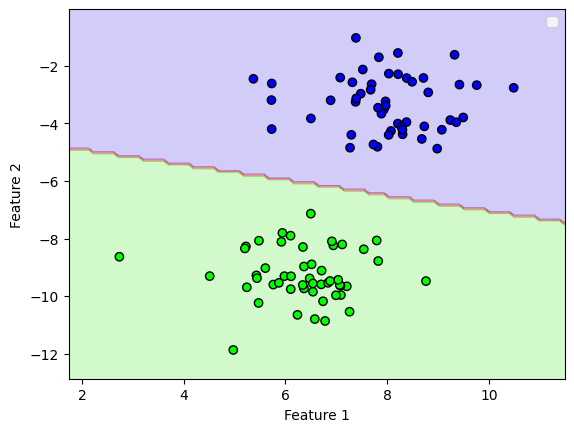

In [29]:

from SVM import SVC
from SVM import SVC




svc = SVC(C=2)
svc.fit(X_train, y_train, kernel_type='linear')


plot_predictions(svc, [X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 
                       X_train[:, 1].min() - 1, X_train[:, 1].max() + 1],
                 X_train, y_train)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


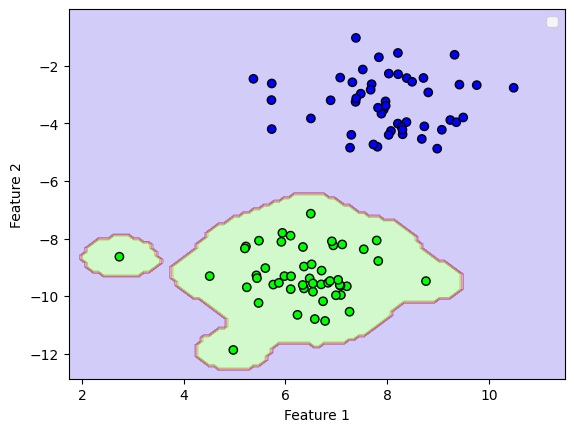

In [31]:

svc = SVC(C=2)
svc.fit(X_train, y_train, kernel_type='rbf', gamma=2)


plot_predictions(svc, [X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 
                       X_train[:, 1].min() - 1, X_train[:, 1].max() + 1],
                 X_train, y_train)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


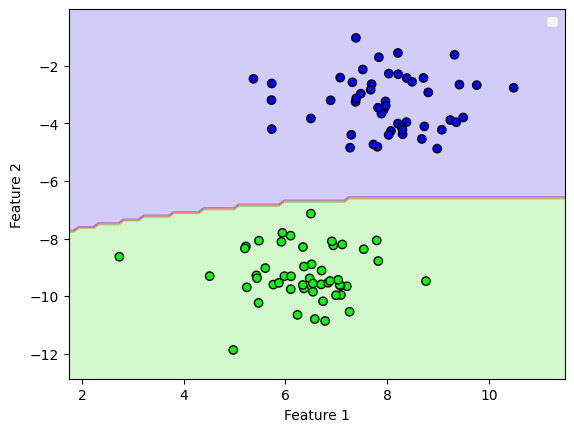

In [30]:

svc = SVC(C=2)
svc.fit(X_train, y_train, kernel_type='polynom', d=2)


plot_predictions(svc, [X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 
                       X_train[:, 1].min() - 1, X_train[:, 1].max() + 1],
                 X_train, y_train)
